<a href="https://colab.research.google.com/github/obengfrancis/Python_project/blob/main/Time_Series_Hotel_Revenues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Training Data loading for SARIMA Model


data= pd.read_csv("/content/TrainingLoanData.csv")
print('Shape of data', data.shape)
data.head()


Shape of data (1048575, 12)


,Location Name,Location City,Location Zip,Location County,Unit Capacity,Obligation End Date (YYYYMMDD),Filer Type,Total Room Receipts,Year,Population,Population Growth Rate,Quarter
0,OMNI AUSTIN HOTEL AT FIC CENTRE ...,AUSTIN,78701,227,314,20000229,50,1213477.0,2000,20944499,4.49,Q1
1,OMNI AUSTIN HOTEL AT FIC CENTRE ...,AUSTIN,78701,227,314,20000331,50,1586063.0,2000,20944499,4.49,Q1
2,OMNI AUSTIN HOTEL AT FIC CENTRE ...,AUSTIN,78701,227,314,20000430,50,1348446.0,2000,20944499,4.49,Q2
3,OMNI AUSTIN HOTEL AT FIC CENTRE ...,AUSTIN,78701,227,314,20000531,50,1483993.0,2000,20944499,4.49,Q2
4,OMNI AUSTIN HOTEL AT FIC CENTRE ...,AUSTIN,78701,227,314,20000630,50,1276623.0,2000,20944499,4.49,Q2


In [ ]:
data['Obligation End Date (YYYYMMDD)'].unique()

array([20000229, 20000331, 20000430, 20000531, 20000630, 20000731,
       20000831, 20000930, 20001031, 20001130, 20001231, 20000131,
       20020228, 20020331, 20020430, 20020531, 20020630, 20020731,
       20020831, 20020930, 20021031, 20021130, 20021231, 20020131,
       20030228, 20030331, 20030430, 20030531, 20030630, 20030731,
       20030831, 20030930, 20031031, 20031130, 20031231, 20030131,
       20040229, 20040331, 20040430, 20040531, 20040630, 20040731,
       20040831, 20040930, 20041031, 20041130, 20041231, 20040131,
       20050531, 20050630, 20050731, 20050831, 20050930, 20051031,
       20051130, 20051231, 20050430, 20050131, 20050228, 20050331,
       20060228, 20060331, 20060430, 20060531, 20060630, 20060731,
       20060831, 20060930, 20061031, 20061130, 20061231, 20060131,
       20070228, 20070331, 20070430, 20070531, 20070630, 20070731,
       20070831, 20070930, 20071031, 20071130, 20071231, 20070131,
       20080229, 20080331, 20080430, 20080531, 20080630, 20080

In [ ]:
data.columns

Index(['Location Name', 'Location City', 'Location Zip', 'Location County',
       'Unit Capacity', 'Obligation End Date (YYYYMMDD)', 'Filer Type',
       'Total Room Receipts', 'Year', 'Population', 'Population Growth Rate',
       'Quarter'],
      dtype='object')

In [ ]:
#we have to check the start and last date to check how many data we have
min = data['Obligation End Date (YYYYMMDD)'].min()
max = data['Obligation End Date (YYYYMMDD)'].max()
print(max, -min)



20141231 -20000131


In [ ]:
#We take only the Obligation End Date (YYYYMMDD) and Total Room Receipts on the data by removing all the others
cols = ['Location Name', 'Location City', 'Location Zip', 'Location County', 'Unit Capacity', 'Filer Type', 'Year', 'Population', 'Population Growth Rate',
       'Quarter']
data.drop(cols, axis=1, inplace=True)

In [ ]:
data.sort_values('Obligation End Date (YYYYMMDD)')

,Obligation End Date (YYYYMMDD),Total Room Receipts
12864,20000131,1481827.46
40680,20000131,13650.00
12662,20000131,41284.75
25436,20000131,281434.27
4496,20000131,75889.00
...,...,...
1000320,20141231,0.00
1000316,20141231,19735.71
1000305,20141231,11250.00
1000361,20141231,2428.00


In [ ]:
#Checking null data points
data.isnull().sum()

Obligation End Date (YYYYMMDD)    0
Total Room Receipts               0
dtype: int64

In [ ]:
data.groupby('Obligation End Date (YYYYMMDD)')['Total Room Receipts'].sum().reset_index()

,Obligation End Date (YYYYMMDD),Total Room Receipts
0,20000131,3.162514e+08
1,20000229,3.752111e+08
2,20000331,4.576147e+08
3,20000430,3.778802e+08
4,20000531,3.919377e+08
...,...,...
163,20140831,7.356192e+08
164,20140930,7.155300e+08
165,20141031,7.761992e+08
166,20141130,6.367833e+08


In [ ]:
data.set_index('Obligation End Date (YYYYMMDD)')

,Total Room Receipts
Obligation End Date (YYYYMMDD),
20000229,1213477.00
20000331,1586063.00
20000430,1348446.00
20000531,1483993.00
20000630,1276623.00
...,...
20140731,20609.36
20140831,18005.92
20140930,12029.29


In [ ]:
#Converting Obligation End Date  to Datetime
data = data.set_index("Obligation End Date (YYYYMMDD)")
data.index = pd.to_datetime(data.index.astype(str), format='%Y%m%d')
print(data)

                                Total Room Receipts
Obligation End Date (YYYYMMDD)                     
2000-02-29                               1213477.00
2000-03-31                               1586063.00
2000-04-30                               1348446.00
2000-05-31                               1483993.00
2000-06-30                               1276623.00
...                                             ...
2014-07-31                                 20609.36
2014-08-31                                 18005.92
2014-09-30                                 12029.29
2014-10-31                                 16889.60
2014-11-30                                 12105.27

[1048575 rows x 1 columns]


In [ ]:
data.index

DatetimeIndex(['2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
               '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30',
               '2000-10-31', '2000-11-30',
               ...
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-31',
               '2014-06-30', '2014-07-31', '2014-08-31', '2014-09-30',
               '2014-10-31', '2014-11-30'],
              dtype='datetime64[ns]', name='Obligation End Date (YYYYMMDD)', length=1048575, freq=None)

<Axes: xlabel='Obligation End Date (YYYYMMDD)'>

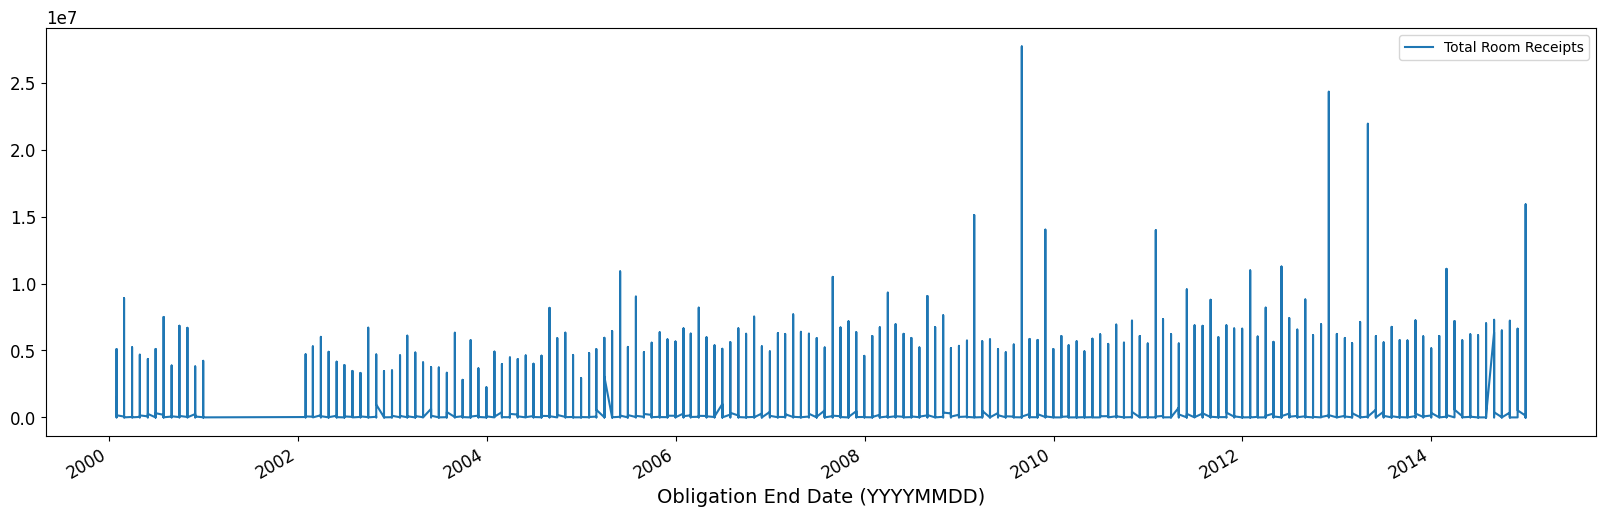

In [ ]:
data.plot(figsize = (20, 6))

In [ ]:
#finding the mean for the total room receipts
y = data['Total Room Receipts'].resample('MS').mean()


In [ ]:
y

Obligation End Date (YYYYMMDD)
2000-01-01    101265.243836
2000-02-01    121703.247457
2000-03-01     73951.954496
2000-04-01    122449.852152
2000-05-01    126065.503471
                  ...      
2014-08-01    100991.100450
2014-09-01     63125.712627
2014-10-01    106826.207019
2014-11-01     88246.017133
2014-12-01     53904.600843
Freq: MS, Name: Total Room Receipts, Length: 180, dtype: float64

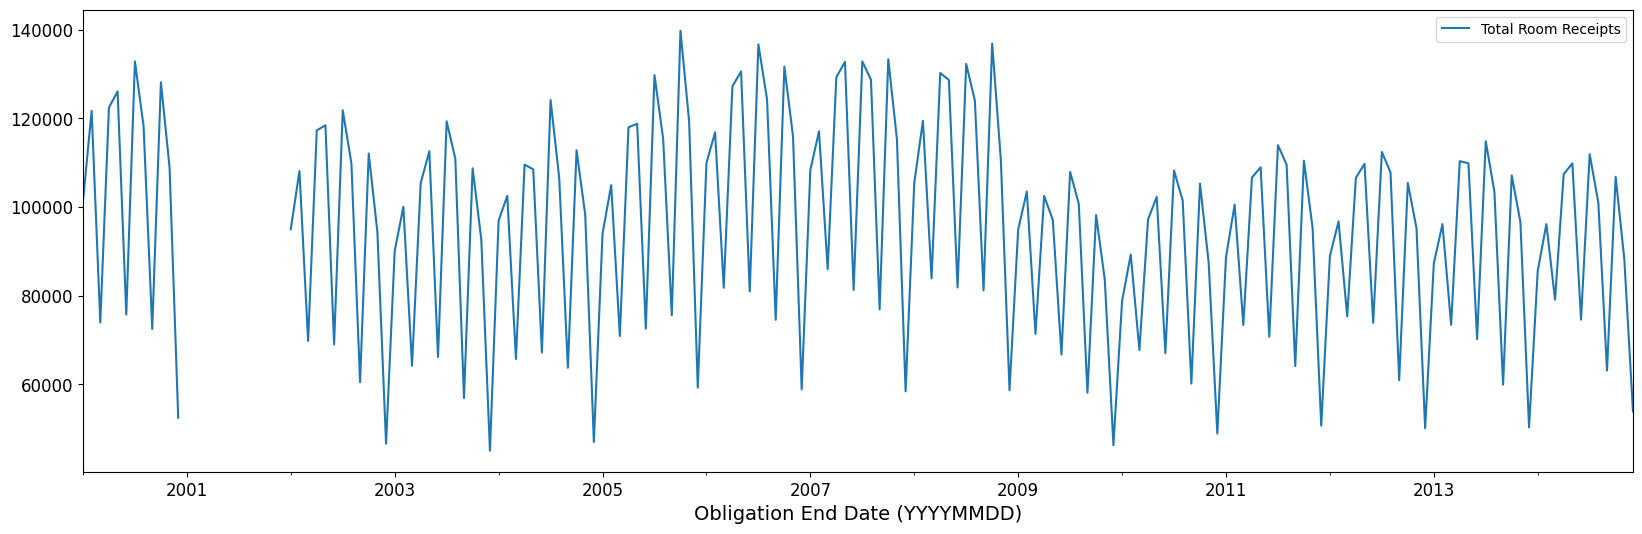

In [ ]:
y.plot(figsize = (20, 6), legend=True)
plt.show()

In [ ]:
#!pip install statsmodels
!pip install statsmodels

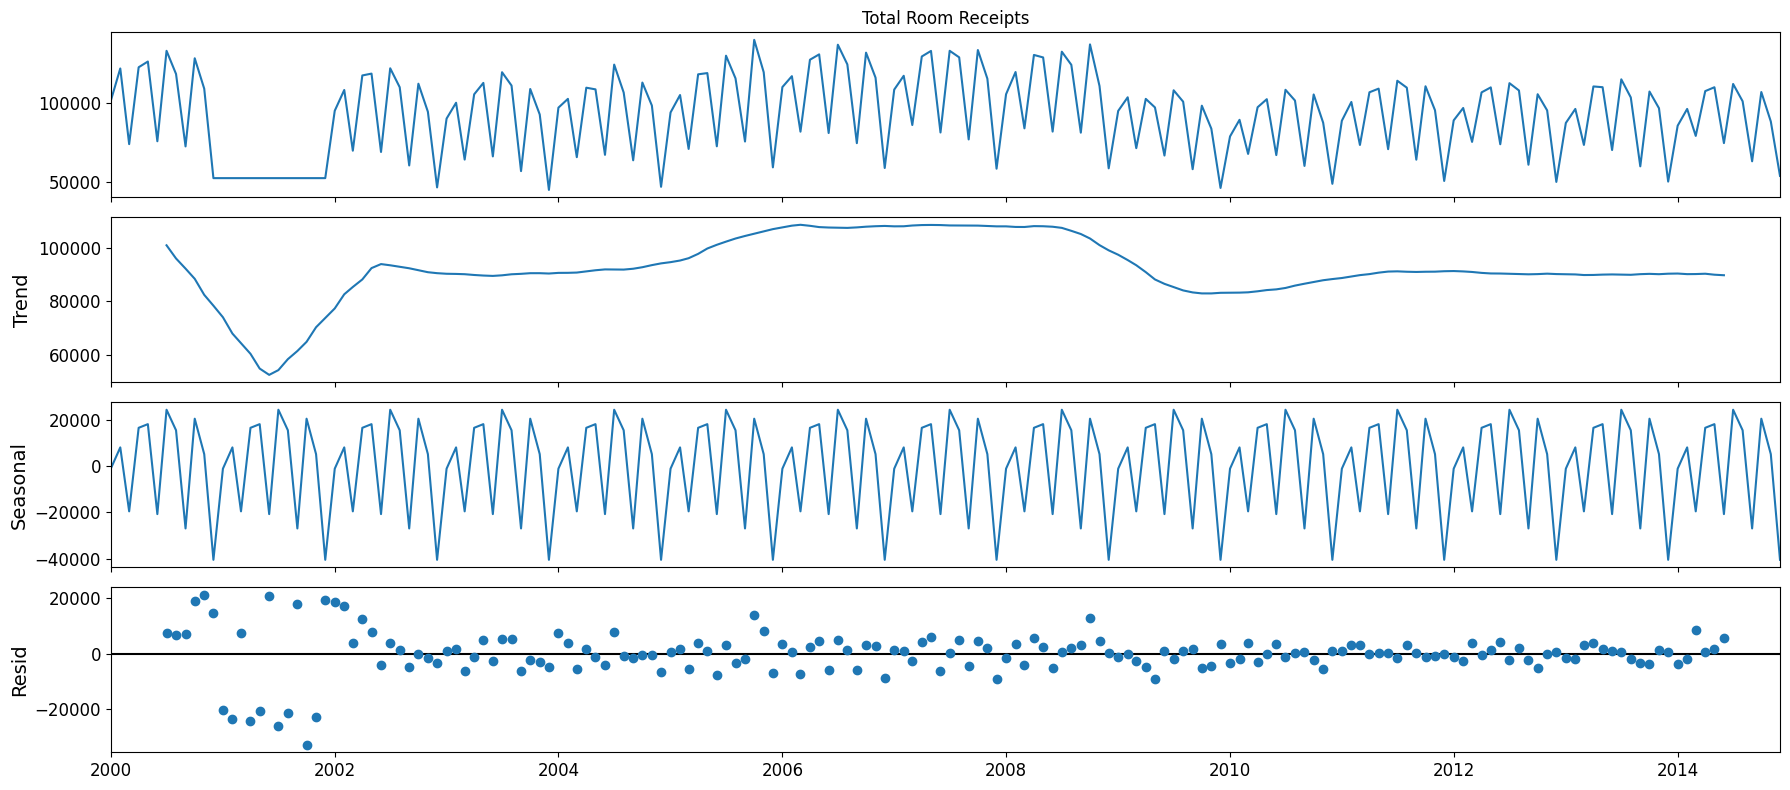

In [ ]:
from matplotlib.pylab import legend
#there are so many distinguishable patterns that appear when we plot the data. there is always upward trend, so we need to use time-series decomposition =>trend, seasonal, and residuals.
#Trend: the increasing or decreasing value in the series
#Seasonality: The repeating short-term cycle in the series
#Noise: the random variations in the series

from pylab import rcParams
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18,8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

y = y.fillna(method='ffill')
decom = sm.tsa.seasonal_decompose(y,model='additive')
fig = decom.plot()
plt.show()

In [ ]:
#Now we can see there is an unstable in total room receipt
#We will forecast the case using ARIMA => ARIMA(p, d, q) => Seasonality, trend and noise in the data

In [ ]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [ ]:
#We can now see the Seasonal ARIMA(SARIMA)
print('SARIMAX: {} X {} '.format(pdq[1],seasonal_pdq[1]))

SARIMAX: (0, 0, 1) X (0, 0, 1, 12) 


In [ ]:
#Now we are going to get the parameter selection for the ARIMA Time Series, we are using "Grid search" to find optimal set of parameters to get better performance
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order = param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA {} X {}12 - AIC:{}'.format(param,param_seasonal,results.aic))
    except:
      continue


ARIMA (0, 0, 0) X (0, 0, 0, 12)12 - AIC:4616.648033748486
ARIMA (0, 0, 0) X (0, 0, 1, 12)12 - AIC:4215.819318287717
ARIMA (0, 0, 0) X (0, 1, 0, 12)12 - AIC:3803.9712460679593
ARIMA (0, 0, 0) X (0, 1, 1, 12)12 - AIC:3403.3964024064253
ARIMA (0, 0, 0) X (1, 0, 0, 12)12 - AIC:3828.3778167650617
ARIMA (0, 0, 0) X (1, 0, 1, 12)12 - AIC:3829.4478374806113
ARIMA (0, 0, 0) X (1, 1, 0, 12)12 - AIC:3384.533759213219
ARIMA (0, 0, 0) X (1, 1, 1, 12)12 - AIC:3383.769089892875
ARIMA (0, 0, 1) X (0, 0, 0, 12)12 - AIC:4472.643167363667
ARIMA (0, 0, 1) X (0, 0, 1, 12)12 - AIC:4141.745028804695
ARIMA (0, 0, 1) X (0, 1, 0, 12)12 - AIC:3672.491764201743
ARIMA (0, 0, 1) X (0, 1, 1, 12)12 - AIC:3360.596751464196
ARIMA (0, 0, 1) X (1, 0, 0, 12)12 - AIC:4172.059731132807
ARIMA (0, 0, 1) X (1, 0, 1, 12)12 - AIC:4122.5978498084005
ARIMA (0, 0, 1) X (1, 1, 0, 12)12 - AIC:3396.8972548905012
ARIMA (0, 0, 1) X (1, 1, 1, 12)12 - AIC:3354.2257485213304
ARIMA (0, 1, 0) X (0, 0, 0, 12)12 - AIC:4238.882593512859
ARIMA (

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result = mod.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2017      0.346     -0.583      0.560      -0.880       0.477
ma.L1         -0.4790      0.236     -2.026      0.043      -0.942      -0.016
ar.S.L12      -0.4347      0.074     -5.893      0.000      -0.579      -0.290
sigma2      2.087e+08   2.42e-10   8.63e+17      0.000    2.09e+08    2.09e+08


In [ ]:
#testing the results if it is suitable for SARIMA model
results

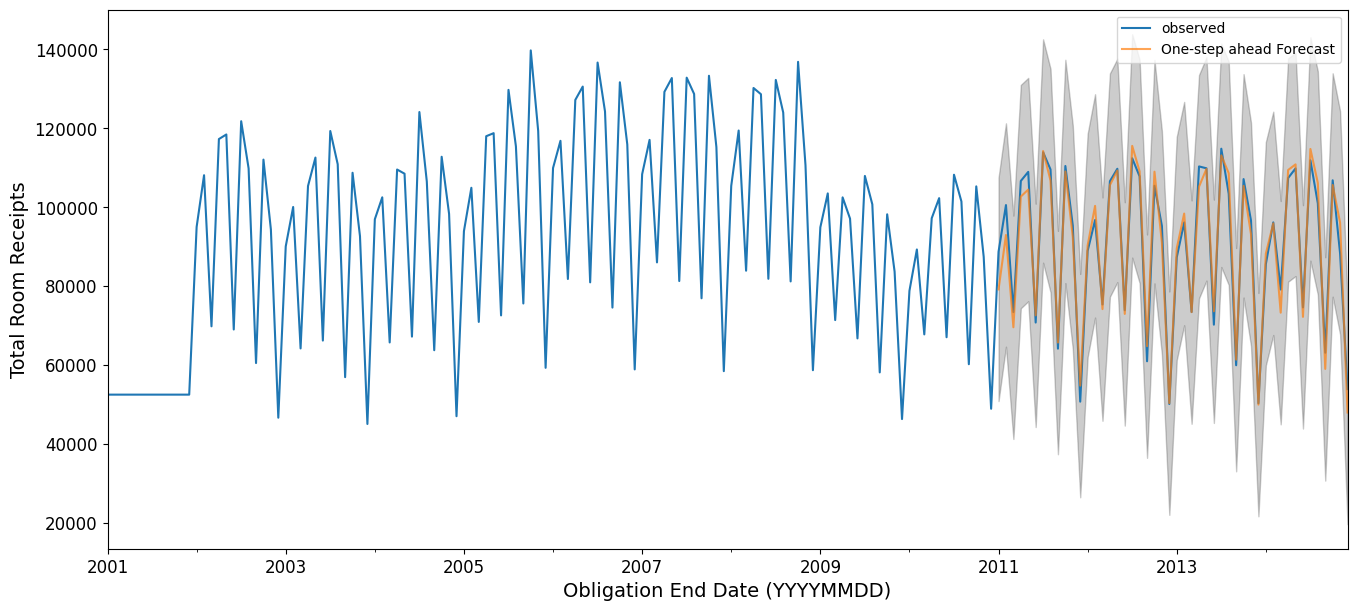

In [ ]:
#Now we want to predict with comparison of observed values and our prediction
pred = results.get_prediction(start=pd.to_datetime('2011-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Obligation End Date (YYYYMMDD)')
ax.set_ylabel('Total Room Receipts')
plt.legend()
plt.show()

In [ ]:
#INTERPRETATION OF THE ABOVE GRAPH
Observed Data (Blue Line): The blue line represents the actual recorded values of 'Total Room Receipts' from 2001 up to a certain point.
This line shows fluctuations over time, which could be due to seasonal effects, underlying trends, or other cyclical factors affecting room receipts.



One-step Ahead Forecast (Orange Line): Starting from around 2011, the orange line indicates the one-step ahead forecasts.
These are predictions for 'Total Room Receipts' made at each point in time, using all the prior observed data. The fact that this line follows the blue line
closely suggests that the model used for forecasting has a good fit for the historical data.



Confidence Interval (Grey Shaded Area): Surrounding the forecasted values, the grey shaded area represents the confidence interval for the forecast.
This interval provides a range that the true future values are likely to fall within, given a certain confidence level (often 95%).
The narrower the shaded area, the more confident the model is in its predictions. In the image, the confidence interval widens as it moves further from the
last observed data point, indicating increasing uncertainty in the forecast as it projects further into the future.

In [ ]:
#Now we want check the mean squared error (MSE) and root mean squared error (RMSE) of the forecast
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of the forecast is {}'.format(round(mse, 2)) )
print('The Root Mean Squared Error of the forecast is {}'.format(round(np.sqrt(mse), 2)) )

The Mean Squared Error of the forecast is 16836626.34
The Root Mean Squared Error of the forecast is 4103.25


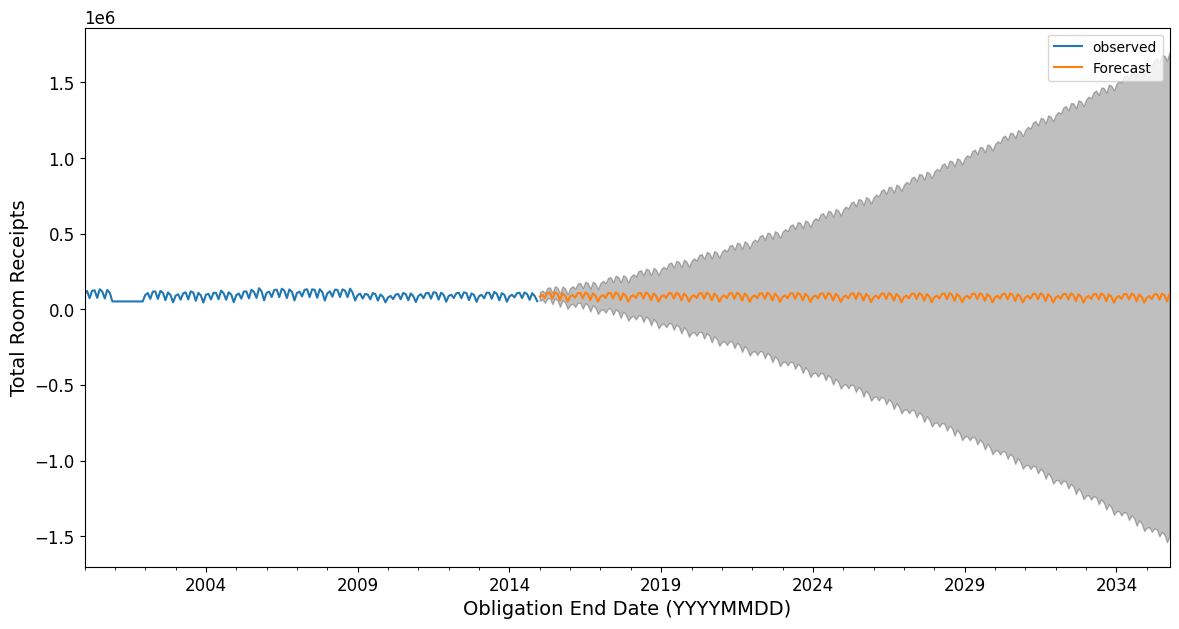

In [ ]:
#Visualizing the forecast
pred_forecast = results.get_forecast(steps=250)
pred_ci = pred_forecast.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Obligation End Date (YYYYMMDD)')
ax.set_ylabel('Total Room Receipts')
plt.legend()
plt.show()

In [ ]:
#Interpretation of the above forecast:
Observed Data (Blue Line): This line represents the historical data points for Total Room Receipts.
The data seems to be relatively stable over the time shown in the graph, with no significant increases or decreases.



Forecasted Data (Orange Line): The forecasted data, which extends beyond the observed data, predicts the future values of Total Room Receipts.
The forecast seems to suggest that the receipts will remain steady without any significant change, following the trend of the historical data.



Confidence Interval (Grey Area): The shaded area represents the confidence interval for the forecast, giving a range where future values are expected
 to lie with a certain level of confidence. The width of the shaded area suggests the level of uncertainty associated with the forecast;
 a wider area would indicate greater uncertainty. In this graph, the confidence interval appears to be quite wide, suggesting that while
 the forecast is for stable receipts, there is significant uncertainty about this prediction."""

In [ ]:
USING THE TESTINGLOANDATA FOR FORECASTING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Training Data loading for SARIMA Model


data= pd.read_csv("/content/TestingLoanData.csv")
print('Shape of data', data.shape)
data.head()

Shape of data (1044714, 12)


,Location Name,Location City,Location Zip,Location County,Unit Capacity,Obligation End Date (YYYYMMDD),Filer Type,Total Room Receipts,Year,Population,Population Growth Rate,Quarter
0,DELUXINN ...,DALLAS,75224,57,80,20160229,50,89345.87,2016,27914064.0,1.62,Q1
1,DELUXINN ...,DALLAS,75224,57,80,20160331,50,93036.79,2016,27914064.0,1.62,Q1
2,DELUXINN ...,DALLAS,75224,57,80,20160430,50,92107.81,2016,27914064.0,1.62,Q2
3,DELUXINN ...,DALLAS,75224,57,80,20160531,50,95248.11,2016,27914064.0,1.62,Q2
4,DELUXINN ...,DALLAS,75224,57,80,20160630,50,92976.00,2016,27914064.0,1.62,Q2


In [ ]:
data['Obligation End Date (YYYYMMDD)'].unique()

array([20160229, 20160331, 20160430, 20160531, 20160630, 20160731,
       20160831, 20160930, 20161031, 20161130, 20161231, 20160131,
       20170228, 20170331, 20170430, 20170531, 20170630, 20170731,
       20170831, 20170930, 20171031, 20171130, 20171231, 20170131,
       20180228, 20180331, 20180430, 20180531, 20180630, 20180731,
       20180831, 20180930, 20181031, 20181130, 20181231, 20180131,
       20190228, 20190331, 20190430, 20190531, 20190630, 20190731,
       20190831, 20190930, 20191031, 20191130, 20191231, 20190131,
       20200131, 20200229, 20200331, 20200430, 20200531, 20200630,
       20210131, 20220630, 20220930, 20221231, 20220131, 20220228,
       20220331, 20220430, 20220531, 20220731, 20220831, 20221031,
       20221130])

In [ ]:
data.columns

Index(['Location Name', 'Location City', 'Location Zip', 'Location County',
       'Unit Capacity', 'Obligation End Date (YYYYMMDD)', 'Filer Type',
       'Total Room Receipts', 'Year', 'Population', 'Population Growth Rate',
       'Quarter'],
      dtype='object')

In [ ]:
#we have to check the start and last date to check how many data we have
min = data['Obligation End Date (YYYYMMDD)'].min()
max = data['Obligation End Date (YYYYMMDD)'].max()
print(min, -max)

20160131 -20221231


In [ ]:
#We take only the Obligation End Date (YYYYMMDD) and Total Room Receipts on the data by removing all the others
cols = ['Location Name', 'Location City', 'Location Zip', 'Location County', 'Unit Capacity', 'Filer Type', 'Year', 'Population', 'Population Growth Rate',
       'Quarter']
data.drop(cols, axis=1, inplace=True)

In [ ]:
data.sort_values('Obligation End Date (YYYYMMDD)')

,Obligation End Date (YYYYMMDD),Total Room Receipts
106314,20160131,79600.15
7807,20160131,0.00
110060,20160131,0.00
30925,20160131,31736.13
110072,20160131,1818.88
...,...,...
836671,20221231,0.00
977106,20221231,4105.19
977117,20221231,0.00
977062,20221231,2142.85


In [ ]:
#Checking null data points
data.isnull().sum()

Obligation End Date (YYYYMMDD)    0
Total Room Receipts               0
dtype: int64

In [ ]:
data.groupby('Obligation End Date (YYYYMMDD)')['Total Room Receipts'].sum().reset_index()

,Obligation End Date (YYYYMMDD),Total Room Receipts
0,20160131,7.497277e+08
1,20160229,8.310675e+08
2,20160331,1.032873e+09
3,20160430,9.711378e+08
4,20160531,9.291477e+08
...,...,...
62,20220831,1.250608e+09
63,20220930,1.379055e+09
64,20221031,1.478303e+09
65,20221130,1.226281e+09


In [ ]:
data.set_index('Obligation End Date (YYYYMMDD)')

,Total Room Receipts
Obligation End Date (YYYYMMDD),
20160229,89345.87
20160331,93036.79
20160430,92107.81
20160531,95248.11
20160630,92976.00
...,...
20220831,0.00
20220930,360.00
20221031,180.00


In [ ]:
#Converting Obligation End Date  to Datetime
data = data.set_index("Obligation End Date (YYYYMMDD)")
data.index = pd.to_datetime(data.index.astype(str), format='%Y%m%d')
print(data)

                                Total Room Receipts
Obligation End Date (YYYYMMDD)                     
2016-02-29                                 89345.87
2016-03-31                                 93036.79
2016-04-30                                 92107.81
2016-05-31                                 95248.11
2016-06-30                                 92976.00
...                                             ...
2022-08-31                                     0.00
2022-09-30                                   360.00
2022-10-31                                   180.00
2022-11-30                                   200.00
2022-12-31                                   135.00

[1044714 rows x 1 columns]


In [ ]:
data.index

DatetimeIndex(['2016-02-29', '2016-03-31', '2016-04-30', '2016-05-31',
               '2016-06-30', '2016-07-31', '2016-08-31', '2016-09-30',
               '2016-10-31', '2016-11-30',
               ...
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Obligation End Date (YYYYMMDD)', length=1044714, freq=None)

<Axes: xlabel='Obligation End Date (YYYYMMDD)'>

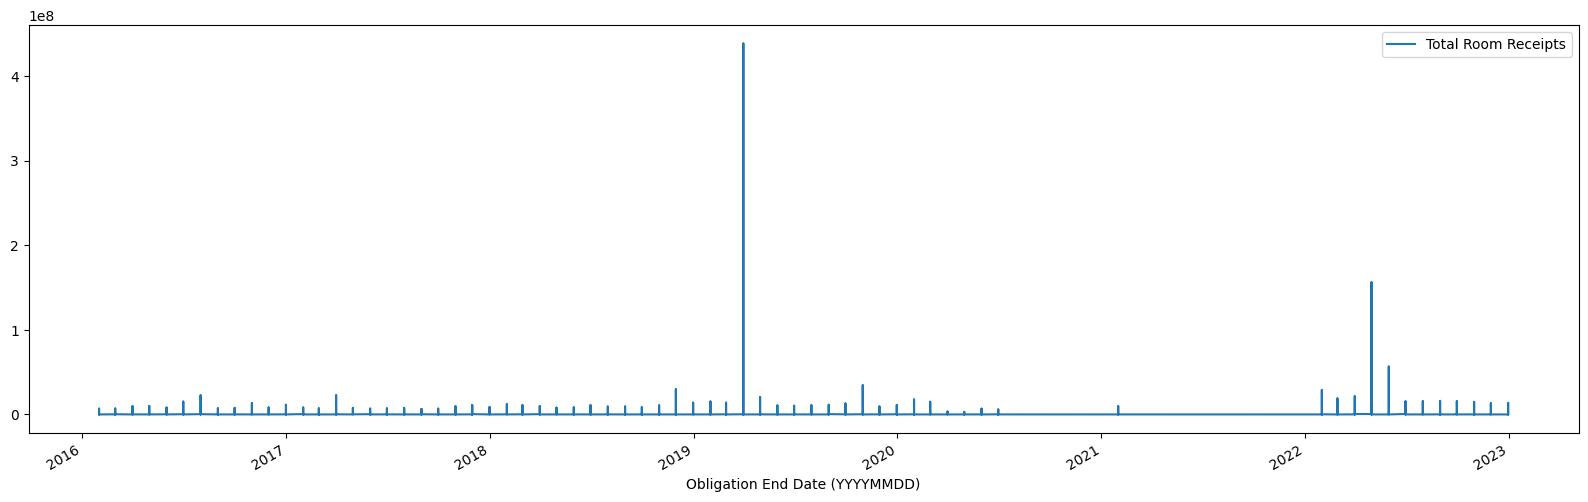

In [ ]:
data.plot(figsize = (20, 6))

In [ ]:
#finding the mean for the total room receipts
y = data['Total Room Receipts'].resample('MS').mean()

In [ ]:
y

Obligation End Date (YYYYMMDD)
2016-01-01    75410.150216
2016-02-01    83073.519739
2016-03-01    62086.598965
2016-04-01    94257.764859
2016-05-01    89186.767327
                  ...     
2022-08-01    70707.737564
2022-09-01    58325.797925
2022-10-01    82841.300291
2022-11-01    68324.099677
2022-12-01    48617.525448
Freq: MS, Name: Total Room Receipts, Length: 84, dtype: float64

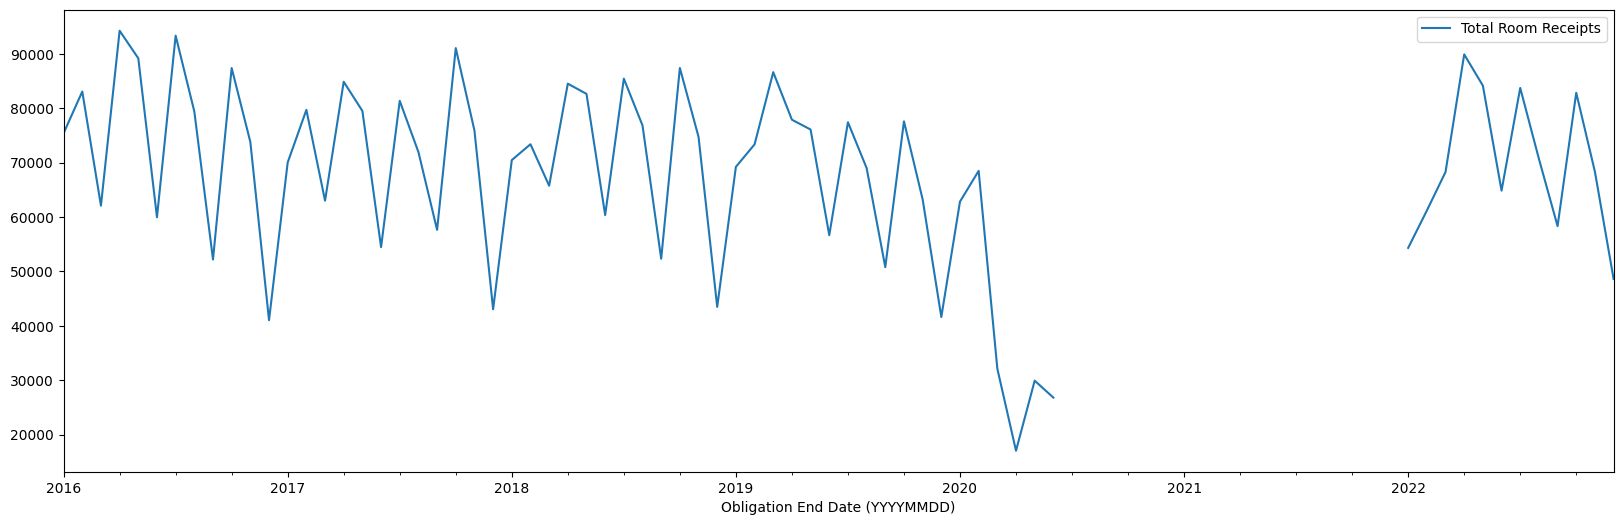

In [ ]:
y.plot(figsize = (20, 6), legend=True)
plt.show()

In [ ]:
#!pip install statsmodels
!pip install statsmodels

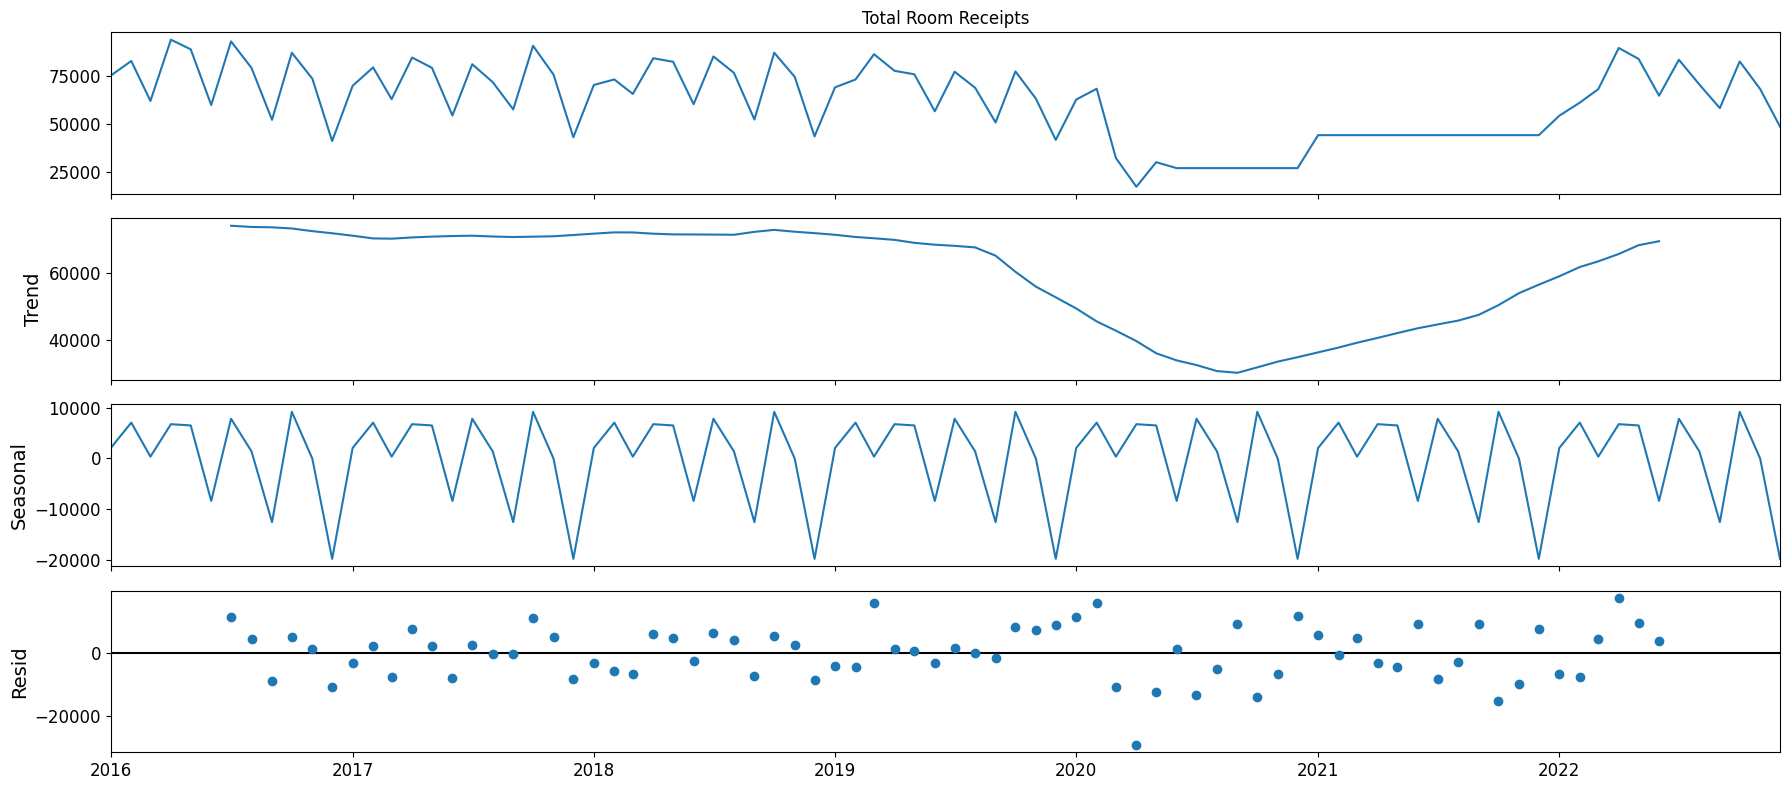

In [ ]:
from matplotlib.pylab import legend
#there are so many distinguishable patterns that appear when we plot the data. there is always upward trend, so we need to use time-series decomposition =>trend, seasonal, and residuals.
#Trend: the increasing or decreasing value in the series
#Seasonality: The repeating short-term cycle in the series
#Noise: the random variations in the series

from pylab import rcParams
import statsmodels.api as sm
import matplotlib
rcParams['figure.figsize'] = 18,8
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

y = y.fillna(method='ffill')
decom = sm.tsa.seasonal_decompose(y,model='additive')
fig = decom.plot()
plt.show()

In [ ]:
#Now we can see there is an unstable in total room receipt
#We will forecast the case using ARIMA => ARIMA(p, d, q) => Seasonality, trend and noise in the data

In [ ]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [ ]:
#We can now see the Seasonal ARIMA(SARIMA)
print('SARIMAX: {} X {} '.format(pdq[1],seasonal_pdq[1]))

SARIMAX: (0, 0, 1) X (0, 0, 1, 12) 


In [ ]:
#Now we are going to get the parameter selection for the ARIMA Time Series, we are using "Grid search" to find optimal set of parameters to get better performance
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order = param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA {} X {}12 - AIC:{}'.format(param,param_seasonal,results.aic))
    except:
      continue

ARIMA (0, 0, 0) X (0, 0, 0, 12)12 - AIC:2076.280548650609
ARIMA (0, 0, 0) X (0, 0, 1, 12)12 - AIC:1719.4043255842284
ARIMA (0, 0, 0) X (0, 1, 0, 12)12 - AIC:1623.999900285824
ARIMA (0, 0, 0) X (0, 1, 1, 12)12 - AIC:1364.0759052608873
ARIMA (0, 0, 0) X (1, 0, 0, 12)12 - AIC:1643.335841518679
ARIMA (0, 0, 0) X (1, 0, 1, 12)12 - AIC:1627.7261459161548
ARIMA (0, 0, 0) X (1, 1, 0, 12)12 - AIC:1382.9381651420322
ARIMA (0, 0, 0) X (1, 1, 1, 12)12 - AIC:1363.6100249507426
ARIMA (0, 0, 1) X (0, 0, 0, 12)12 - AIC:1996.7234972991719
ARIMA (0, 0, 1) X (0, 0, 1, 12)12 - AIC:1692.764818592114
ARIMA (0, 0, 1) X (0, 1, 0, 12)12 - AIC:1560.2358932797968
ARIMA (0, 0, 1) X (0, 1, 1, 12)12 - AIC:1295.9326463483346
ARIMA (0, 0, 1) X (1, 0, 0, 12)12 - AIC:1734.559899839467
ARIMA (0, 0, 1) X (1, 0, 1, 12)12 - AIC:1688.5015793751413
ARIMA (0, 0, 1) X (1, 1, 0, 12)12 - AIC:1342.8471520240635
ARIMA (0, 0, 1) X (1, 1, 1, 12)12 - AIC:1297.4185602424798
ARIMA (0, 1, 0) X (0, 0, 0, 12)12 - AIC:1843.0656554873865
AR

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result = mod.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2312      0.351      0.658      0.511      -0.458       0.920
ma.L1         -0.5424      0.334     -1.626      0.104      -1.196       0.112
ar.S.L12      -0.1904      0.088     -2.169      0.030      -0.362      -0.018
sigma2      1.721e+08   7.47e-10    2.3e+17      0.000    1.72e+08    1.72e+08


In [ ]:
#testing the results if it is suitable for SARIMA model
results

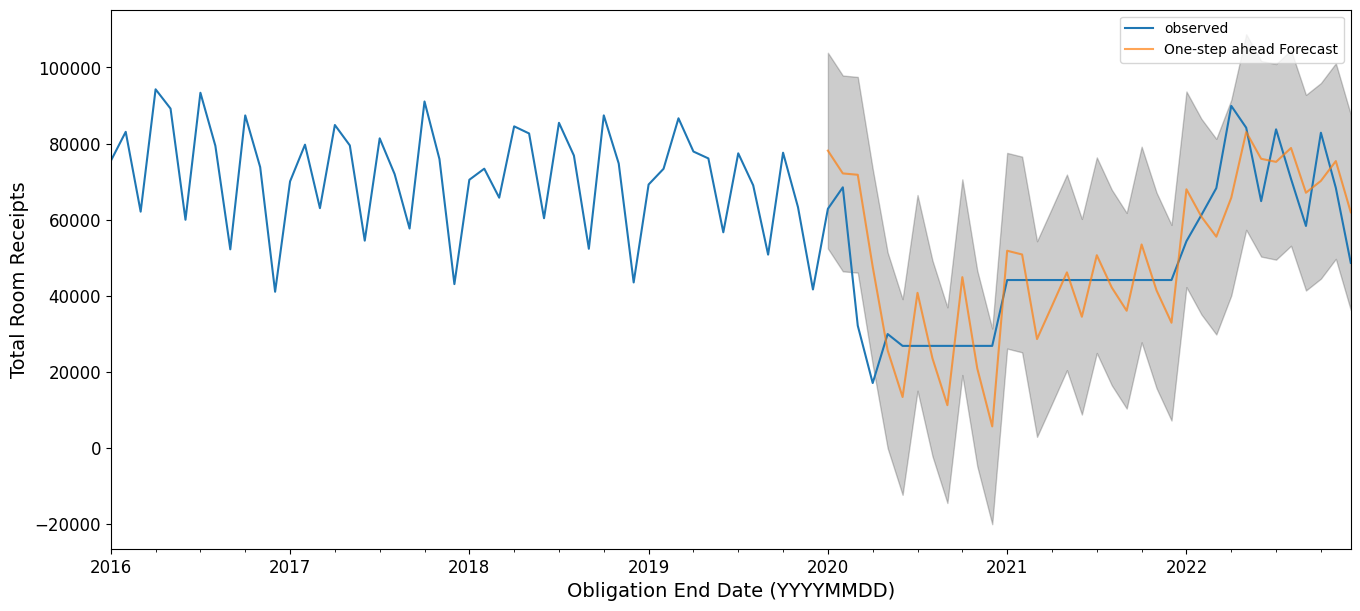

In [ ]:
#Now we want to predict with comparison of observed values and our prediction
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(16, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Obligation End Date (YYYYMMDD)')
ax.set_ylabel('Total Room Receipts')
plt.legend()
plt.show()

In [ ]:
#INTERPRETATION OF THE ABOVE GRAPH
Observed Data (Blue Line): The blue line represents the actual recorded values of 'Total Room Receipts' from 2016 up to 2020.
This line shows fluctuations over time, which could be due to seasonal effects, underlying trends, or other cyclical factors affecting room receipts.



One-step Ahead Forecast (Orange Line): Starting from around 2020, the orange line indicates the one-step ahead forecasts.
These are predictions for 'Total Room Receipts' made at each point in time, using all the prior observed data. The fact that this line follows the blue line
closely suggests that the model used for forecasting has a good fit for the historical data.



Confidence Interval (Grey Shaded Area): Surrounding the forecasted values, the grey shaded area represents the confidence interval for the forecast.
This interval provides a range that the true future values are likely to fall within, given a certain confidence level (often 95%).
The narrower the shaded area, the more confident the model is in its predictions. In the image, the confidence interval widens as it moves further from the
last observed data point, indicating increasing uncertainty in the forecast as it projects further into the future.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of the forecast is {}'.format(round(mse, 2)) )
print('The Root Mean Squared Error of the forecast is {}'.format(round(np.sqrt(mse), 2)) )

The Mean Squared Error of the forecast is 185995074.23
The Root Mean Squared Error of the forecast is 13638.0


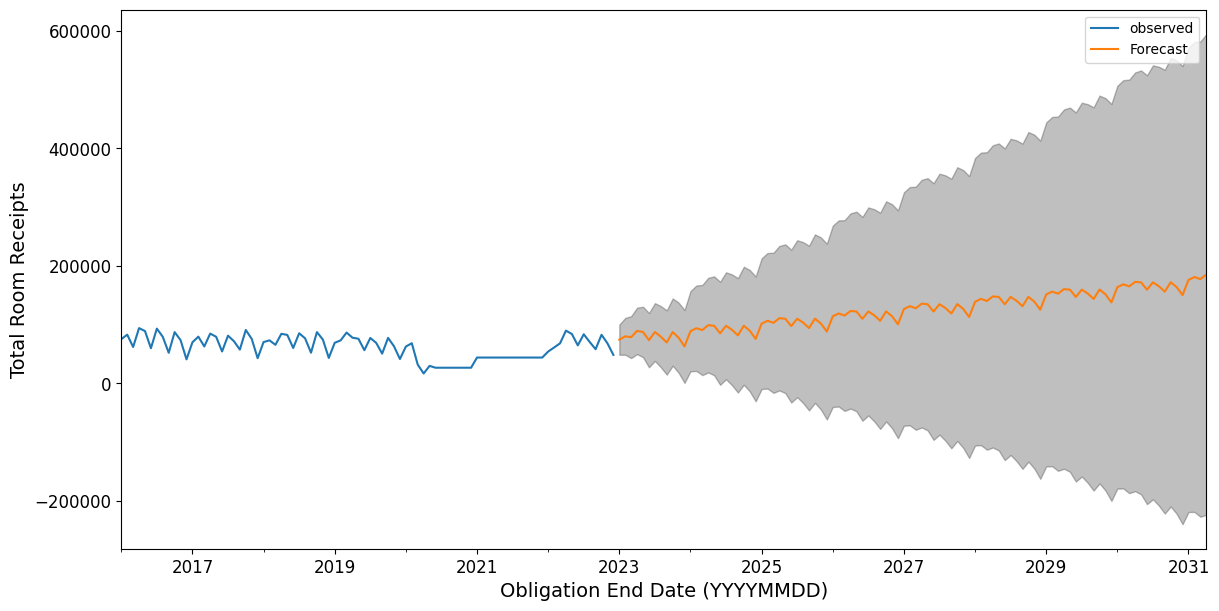

In [ ]:
#Visualizing the forecast
pred_forecast = results.get_forecast(steps=100)
pred_ci = pred_forecast.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Obligation End Date (YYYYMMDD)')
ax.set_ylabel('Total Room Receipts')
plt.legend()
plt.show()

In [ ]:
X-Axis (Horizontal): It represents the time, labeled as "Obligation End Date (YYYYMMDD)". This suggests the dates are formatted as Year-Month-Day, spanning from the year 2017 to 2031.

Y-Axis (Vertical): It shows "Total Room Receipts", which could be a financial metric, possibly related to hotel or rental room income.

Blue Line: This line represents the actual observed data. It starts at the beginning of 2017 and continues until about 2021, indicating the historical data for the Total Room Receipts.

Orange Line: This line is the forecast data, which seems to start where the observed data ends. The forecast extends beyond 2021 to 2031.

Grey Area: This shaded area represents the confidence interval or prediction interval around the forecast. It indicates the range of possible values that the actual data could take,
with a certain level of confidence. The wider the area, the greater the uncertainty about the forecast.

Overall, the graph shows that the Total Room Receipts were relatively stable until 2021, after which there is a forecast of growth. The confidence interval suggests that while
there's an expected increase, there's also significant uncertainty about the exact values in the future.

In [ ]:
#SARIMA MODEL

In [ ]:
# Split the data into training and testing sets 80:20 split


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Define the model
model = SARIMAX(data, order=(p,d,q), seasonal_order=(P,D,Q,s))

# Fit the model
results = model.fit()

# Make predictions
predictions = results.predict(start=start_index, end=end_index)

# New Section


Libraries we should use: pandas, numpy, matplotlib, statsmodels

We should use SARIMA or LSTM?

To be able to load data from google drive, you need a shortcut to the folder for this project in the root of your own google drive (when you click on "My Drive" you should be able to see the folder). To do this, right click the "Time Series Hotel Project" folder and click organize. Then click "Add Shortcut", select "My Drive" and click the add button. The code below for loading in the test csv should work after doing this, and you should only have to do it once. Feel free to let me know on discord if you have issues.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

**Loading the data**

In [ ]:
#Reading the data
df = pd.read_csv("HOTEL2019.csv")

# set column names (from Hotel File Record Layout)
column_names = [
    "Taxpayer Number",
    "Taxpayer Name",
    "Taxpayer Address",
    "Taxpayer City",
    "Taxpayer State",
    "Taxpayer Zip",
    "Taxpayer County",
    "Taxpayer Phone",
    "Location Number",
    "Location Name",
    "Location Address",
    "Location City",
    "Location State",
    "Location Zip",
    "Location County",
    "Location Phone",
    "Unit Capacity",
    "Responsibility Begin Date (YYYYMMDD)",
    "Responsibility End Date (YYYYMMDD)",
    "Obligation End Date (YYYYMMDD)",
    "Filer Type",
    "Total Room Receipts",
    "Taxable Receipts",
]
df.columns = column_names

# drop unwanted columns (these may change)
unwanted_columns = [
    "Taxpayer Number",
    "Taxpayer Name",
    "Taxpayer Address",
    "Taxpayer City",
    "Taxpayer State",
    "Taxpayer Zip",
    "Taxpayer County",
    "Taxpayer Phone",
    ]
df.drop(columns=unwanted_columns, inplace=True)
df.head()

<ipython-input-2-14e757d1eb50>:2: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HOTEL2019.csv")


,Location Number,Location Name,Location Address,Location City,Location State,Location Zip,Location County,Location Phone,Unit Capacity,Responsibility Begin Date (YYYYMMDD),Responsibility End Date (YYYYMMDD),Obligation End Date (YYYYMMDD),Filer Type,Total Room Receipts,Taxable Receipts
0,2,DELUXINN ...,4610 S R L THORNTON FWY,DALLAS,TX,75224,057,,80,20100222,,20190228,50,90354.23,90354.23
1,2,DELUXINN ...,4610 S R L THORNTON FWY,DALLAS,TX,75224,057,,80,20100222,,20190331,50,109928.13,109928.13
2,2,DELUXINN ...,4610 S R L THORNTON FWY,DALLAS,TX,75224,057,,80,20100222,,20190430,50,92460.62,92460.62
3,2,DELUXINN ...,4610 S R L THORNTON FWY,DALLAS,TX,75224,057,,80,20100222,,20190531,50,108171.41,108171.41
4,2,DELUXINN ...,4610 S R L THORNTON FWY,DALLAS,TX,75224,057,,80,20100222,,20190630,50,106584.03,106584.03


In [ ]:
x = df[[
    "Location Zip",

    "Unit Capacity",
    ]]
x.shape

(203932, 2)

In [ ]:
y = df["Total Room Receipts"]
y.shape

(203932,)

In [ ]:
x = np.asarray(x).astype('float32')

In [ ]:
y = np.asarray(y).astype('float32')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 80:20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X train", x_train.shape)
print("Shape of X test", x_test.shape)

Shape of X train (163145, 2)
Shape of X test (40787, 2)


In [ ]:
y_train = np.asarray(y_train).reshape((-1,1))  #make it soo the training and testing Y is in the right format and doesnt cause error
y_test = np.asarray(y_test).reshape((-1,1))
print("Training y:", y_train.shape)
print("Testing y: ", y_test.shape)

Training y: (163145, 1)
Testing y:  (40787, 1)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
y_train=y_train.reshape(y_train.shape[0],y_train.shape[1],1)

In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
y_test=y_test.reshape(y_test.shape[0],y_test.shape[1],1)

**Creating LSTM Neural Network**

In [ ]:
modelLSTM = tf.keras.Sequential() #allows us to create an layered model using tensorflow

In [ ]:
modelLSTM.add(tf.keras.layers.LSTM(units = 100, activation = "tanh", return_sequences=True, input_shape=(x_train.shape[1], 1)))   #input_shape=(x_train.shape[0], x_train.shape[1])

In [ ]:
modelLSTM.add(tf.keras.layers.Dropout(0.2))  #this will help prevent overfitting

In [ ]:
modelLSTM.add(tf.keras.layers.Dense(1))  #output layer

In [ ]:
modelLSTM.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
modelLSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 2, 100)            40800     
                                                                 
 dropout_2 (Dropout)         (None, 2, 100)            0         
                                                                 
 dense_2 (Dense)             (None, 2, 1)              101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
trainLSTM = modelLSTM.fit(x_train, y_train, epochs=100, batch_size=16, validation_split = 0.2, verbose=1)

Epoch 1/100
8158/8158 [==============================] - 50s 6ms/step - loss: 73844187136.0000 - val_loss: 116162510848.0000
Epoch 2/100
8158/8158 [==============================] - 46s 6ms/step - loss: 73783525376.0000 - val_loss: 116099899392.0000
Epoch 3/100
8158/8158 [==============================] - 44s 5ms/step - loss: 73722494976.0000 - val_loss: 116037894144.0000
Epoch 4/100
8158/8158 [==============================] - 48s 6ms/step - loss: 73663627264.0000 - val_loss: 115976536064.0000
Epoch 5/100
8158/8158 [==============================] - 43s 5ms/step - loss: 73604104192.0000 - val_loss: 115916185600.0000
Epoch 6/100
8158/8158 [==============================] - 44s 5ms/step - loss: 73546186752.0000 - val_loss: 115856949248.0000
Epoch 7/100
8158/8158 [==============================] - 45s 6ms/step - loss: 73489457152.0000 - val_loss: 115797876736.0000
Epoch 8/100
8158/8158 [==============================] - 44s 5ms/step - loss: 73432784896.0000 - val_loss: 115739860992.0000


KeyboardInterrupt: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Load and preprocess your data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units, input shape as (number of time steps, number of features)
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Another LSTM layer with 50 units
model.add(LSTM(50))

# Add a Dense layer with 1 unit (output layer)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Train Loss: ", train_loss)
print("Test Loss: ", test_loss)

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions back to original scale
y_pred_original = scaler.inverse_transform(y_pred)
